In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from microtc.textmodel import TextModel
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import  MultinomialNB
from sklearn.metrics import f1_score as f1, accuracy_score as acc 
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
#import seaborn as sns

# An√°lisis sem√°ntico

Los vectores TF-IDF (t√©rminos frecuencia-vectores de frecuencia inversa del documento) que definimos en las secciones previas pueden ser utilizado para  determinar la importancia de las palabras en un fragmento de texto. As√≠ como para calcular la importancia de cada palabra para el significado general de un fragmento de texto en una colecci√≥n de documentos. 
Los valores de `importancia` de TF-IDF, tambi√©n pueden ser calculados para secuencias cortas de palabras, es decir para $n$-gramas. Sin embargo los sistemas de NLP quiere ir m√°s all√°, se desea que una m√°quina sea capaz de comprender el `significado` de las palabras.

Una de las formas de hacerlo mediante el uso de `WordEmbeddings` que revisamos brevemente en la secci√≥n previa. Por otro lado una de la primeras formas que se utilizaron es el denominado an√°lisis sem√°ntico latente (latent semantic analysis LSA). El uso de LSA, no solo permite representar el significado de las palabras como vectores, sino que permite que las usarlas para representar el significado de documentos completos, es decir el t√≥pico del que trata el documento.

En esta secci√≥n, se presentar√°n los que denominaremos vectores sem√°nticos o de t√≥pico/tema. Se obtienen mediante el uso TF-IDF para calcular `√≠ndices` (scores) de tema que componen las dimensiones de los vectores de t√≥pico. Lo anterior se basa en  el uso de la correlaci√≥n de frecuencias de t√©rminos normalizados entre s√≠ para agrupar palabras que consitutir√°n un tema.
Los vectores de t√≥picos de pueden utilizar para identificar documentos en funci√≥n de su significado: b√∫squeda sem√°ntica. La mayor√≠a de las veces, la b√∫squeda sem√°ntica es mejor que la b√∫squeda por palabras clave.  La b√∫squeda sem√°ntica es capaz de obtener resultados incluso cuando no se incluyen los t√©rminos exactos en la consulta.

Mediante el uso de los vectores sem√°nticos para identificar las palabras y n-gramas que mejor representan el t√≥pico de una sentencia, documento o colecci√≥n de documentos (corpus). Con los vectores sem√°nticos es posible comparar que tan `similares` en siginificado son dos elementos (sentencias, documentos).

## Frecuencia de t√©rminos  y pesado  de t√≥picos

Los vectores TF-IDF se generar mediante el conteo de las palabras en un documento, cada t√©rminos debe coincidir de fomar exacta para se contenado en la misma palabra (al menos as√≠ es cuando no se utiliza steming o lematizaci√≥n). Por lo tanto, los t√©rminos que tienen el mismo significado pero se escriben diferente  tendr√°n representaciones de vectoriales TF-IDF completamente diferentes. Es por ello que las b√∫squedas por palabra clave  pueden exihibir un desempe√±o pobre en representaciones basada en frecuencia de t√©rminos.

Meidante el uso de stemming/lematizaci√≥n, la palabras que comparten una misma ra√≠z se agrupan en un sola t√©rmino, con lo cual de obtienen colecciones de palabras con graf√≠as similares y, a menudo, significados similares. La etiqueta de cada colecci√≥n de palabras reemplaza en la lista de tokens a las palabras originales.

El enfoque previo solo garantiza que palabras escritas `de manera similar` se unifican en un solo token, pero no necesariamente garantiza que sus significados sean similares. Ni tampoco puede ser utilizada para emparejar la mayor√≠a de los sin√≥nimos. Esto ya que los sin√≥nimos suelen diferir en m√°s formas que las terminaciones de las palabras con las que se ocupan la lematizaci√≥n y stemming. Peor a√∫n, la lematizaci√≥n/steaming a veces agrupan err√≥neamente ant√≥nimos, palabras con significado opuesto.

Derivado de lo anterior puede ocurrir que dos fragmentos de texto que hablan sobre lo mismo pero usan palabras diferentes no ser√°n identificados como  `similares/cercanos` entre s√≠ en un espacio vectorial TF-IDF lematizado. Adem√°s, es com√∫n,  que dos vectores TF-IDF que utilizan derivaciones que son `cercanos` entre si, no necesariamente tienen un significado similar. 


### Vectores de  t√≥picos(tema)

La estad√≠stica de palabras obtenidas por la representaci√≥n TF-IDF, nos permite realizar operaciones matem√°ticas. Sin embargo, esas opercaiones nodicen mucho sobre como est√°n relacionados los significados de las sentencias. Tambi√©n es posible calcular las representaciones TF-IDF palabra a palabra (vectores de co-ocurrencia o correlaci√≥n de palabras) multiplicando la matriz TF-IDF por s√≠ misma. Pero el `razonamiento vectorial` con estos vectores escasos y de alta dimensi√≥n no funciona bien. Las operaciones con estos vectores entre s√≠, no representan bien un concepto, palabra o t√≥pico existente. 

En particular, nos  gustar√≠a representar ese significado con un vector que al diferencia de un vector TF-IDF sea mas compacto (menor dimensi√≥n) y con m√°s significado. A estos vectores de significado se les conoce `vectores palabra-tema`. Cuando estos vectores se crean por documento se les denomina `vectores de documento-tema`. Podemos referirnos a ellos indistitamento como `vectores de tema` o `vectores de t√≥pico`. Estos vectores tem√°ticos pueden ser compactos o de alta dimensi√≥n como desee.

Lo vectores de t√≥pico a defierencia de TF-IDF perminten que la operaciones como sumas y diferencias representen una relaci√≥n entre el significado de los elementos implicados. Es decir, podemos utilizar las distancias entre los vectores de tema para realizar  agrupaci√≥n de documentos o b√∫squeda sem√°ntica. Mientras que TF-IDF, permite  agrupar y buscar usando palabras clave.

Partiendo de que se obtiene un vector palabra-tema para cada palabra en su l√©xico (vocabulario). Es posible calcular el vector de tema para cualquier documento nuevo simplemente sumando todos sus vectores de tema de palabra.

Sin embargo, obtener una representaci√≥n num√©rica de la sem√°ntica (significado) de palabras y oraciones puede ser complicado. Esto es especialmente cierto para los idiomas `difusos` como el ingl√©s o el espa√±ol, que tiene varios dialectos y m√∫ltiples interpretaciones diferentes de las mismas palabras. Este concepto de palabras con m√∫ltiples significados se llama polisemia:

- **Polisemia**: es la existencia de palabras y frases con m√°s de un significado.

A continuaci√≥n enumeramos algunas formas en las que la polisemia puede afectar la sem√°ntica de una palabra o enunciado:

- Escritos:
    - *Hom√≥nimos*: palabras con la misma ortograf√≠a y pronunciaci√≥n, pero con diferentes significados.
    - *Zeugma* : uso de dos significados de una palabra simult√°neamente en la misma oraci√≥n 

- Voz
    - *Hom√≥grafos* : las palabras se escriben igual, pero con diferentes pronunciaciones y significados
    - *Hom√≥fonos*:  palabras con la misma pronunciaci√≥n, pero diferentes deletreos y significados 

LSA puede lidiar con todos fen√≥menos polisemicos menccionados. Como ejemplo consider  las siguientes frases:
- `... √©l tuvo que cortar el tubo ...`
- `Evita evita la confrontaci√≥n`
- `Grabe este grave asunto`

El problema al que no enfretamos es el reducir un vector TF-IDF de alta dimensi√≥n (decenas de miles de t√©rminos) a un vector unas pocas dimensiones (unas decenas). Para resolverto debemos encontrar esas dimensiones (palabras) que en conjunto representan un `t√≥pico/tema` y sumar sus valores TF-IDF para crear un nuevo vector que representa la `relevancia` de ese tema en un documento dado. Una vez indentificados, podr√≠amos ponderarlos por lo importantes que son para el tema, incluso podr√≠an tener pesos negativos para las palabras que reducen la probabilidad de que el texto trate sobre ese tema. 

### Un ejemplo 
Supongamos que dado un vector TF-IDF para un documento se desea convertirlo en un vector de tema. Se debe pensar en cu√°nto contribuye cada palabra a tus temas. Supongamos que se tienen algunas sentencias sobre tres temas `animales`, `educacion` y `salud`. El tema `animales` dar√≠a mayor peso a palbaras **leon**, **gato**,etc;  
y probablemente ignorar√≠a palabras como **historia**, **geografia**. El tema `educaci√≥n` pordr√≠a darle poco peso los nombres de animales si tuvieran alguna relaci√≥n con **ciencias naturales** por ejemplo. Vamos a `generar` un modelo utilizando solo nuestra intuci√≥n.

In [2]:
topicos={}
# nuestra lista de terminos consiste de solo 6 palabras y generamos sus representaciones tfidf de forma aleatoria
tokens=['perro','gato','historia','examen','vacuna','gripe']
np.random.seed(33) # Para garantizar reproducibilidad
tfidf={token: np.random.rand(6) for  token in tokens } 

In [3]:
tfidf

{'perro': array([0.24851013, 0.44997542, 0.4109408 , 0.26029969, 0.87039569,
        0.18503993]),
 'gato': array([0.01966143, 0.95325203, 0.6804508 , 0.48658813, 0.96502682,
        0.39339874]),
 'historia': array([0.07955757, 0.35140742, 0.16363516, 0.98316682, 0.88062818,
        0.49406347]),
 'examen': array([0.40095924, 0.45129146, 0.72087685, 0.24776828, 0.62277995,
        0.14244882]),
 'vacuna': array([0.20117628, 0.08121773, 0.95347229, 0.05573827, 0.59953648,
        0.72299763]),
 'gripe': array([0.97028972, 0.82156946, 0.52755107, 0.33147673, 0.3539822 ,
        0.0790303 ])}

In [4]:
0.8*tfidf['perro']+0.8*tfidf['gato']-0.1*tfidf['historia']-0.1*tfidf['examen']

array([0.16648556, 1.04231207, 0.78466209, 0.47441674, 1.31799719,
       0.3990997 ])

In [5]:
# ahora suponemos los pesos de cada palabra en cada t√≥pico
pesos_animales=[0.8,0.8,-0.1,-0.1,0.2,0.2] 
# suponemos un peso de 0.5 para perro y gato, 
# -0.1 para historia y examen y  0.2 para vacuna y gripe
pesos_educacion=[0.1,0.1,0.7,0.7,-0.1,-0.1] 
pesos_salud=[0,0,-0.2,-0.2,0.6,0.8] 
topicos['animales']=np.sum([peso*tfidf[token] for peso,token in zip(pesos_animales,tokens)], axis=1)
topicos['educacion']=np.sum([peso*tfidf[token] for peso,token in zip(pesos_educacion,tokens)], axis=1)
topicos['salud']=np.sum([peso*tfidf[token] for peso,token in zip(pesos_salud,tokens)], axis=1)

In [6]:
topicos

{'animales': array([ 1.94012933,  2.79870236, -0.29524586, -0.25861246,  0.52282774,
         0.61677989]),
 'educacion': array([ 0.24251617,  0.34983779,  2.06672104,  1.81028722, -0.26141387,
        -0.30838995]),
 'salud': array([ 0.        ,  0.        , -0.59049173, -0.51722492,  1.56848321,
         2.46711958])}

En este ejercicio los pesos de cada palabra los ponemos en funci√≥n de la probabilidad que suponemos que cada palabra est√© asociada con un tema en particular y sumamos los vectores resultantes. Cuando suponemos que una palabra no est√° relacionada con el t√≥pico podemos suponer un peso de 0 o incluso un peso negativo si est√° aumenta la probabilidad que el documento no este relacionado con el t√≥pico. El ejerciocio solo pretenden ilustrar como deber√≠a operar el algoritmo que aprender√° los vectores sem√°nticos. 

La transformaci√≥n al modelado de temas est√° dada por la matriz de proporciones (pesos) que conecta los temas con cada palabara en el vocabulario (en este cado 3x6). Cada vector TF-IDF de dimension del tama√±o del vocabulario (para el ejemplo 6 x 1) deber√≠a multiplicarse por la matriz de t√≥picos  para obtener el vector de tema de 3 x 1.

En este ejemplo intuimos los los pesos, pero para poder implementar un algoritmo deber√≠amos preguntarnos ¬øC√≥mo podr√≠as optimizarlos pesos? ¬øQu√© podr√≠a utilizarse como medida objetiva de lo pesos? ¬øQue efecto tiene el corpus utilizado? Otra persona podr√≠a decidir que los pesos asignado sean diferente en ese caso: ¬øQu√© podr√≠amos hacer para llegar a un consenso sobre sus opiniones sobre estas seis palabras y tres temas?

Note que  la matriz obtenida nos dice como cada t√≥pico es representado por el vocabulario

In [7]:
pd.DataFrame(topicos,index=tokens).transpose()

perro      gato  historia    examen    vacuna    gripe
animales   1.940129  2.798702 -0.295246 -0.258612  0.522828  0.61678
educacion  0.242516  0.349838  2.066721  1.810287 -0.261414 -0.30839
salud      0.000000  0.000000 -0.590492 -0.517225  1.568483  2.46712

si transponemos la matriz podemos obtener los vectores para cada palabra en terminos de cada t√≥pico

In [8]:
word_vector=pd.DataFrame(topicos,index=tokens)
word_vector

animales  educacion     salud
perro     1.940129   0.242516  0.000000
gato      2.798702   0.349838  0.000000
historia -0.295246   2.066721 -0.590492
examen   -0.258612   1.810287 -0.517225
vacuna    0.522828  -0.261414  1.568483
gripe     0.616780  -0.308390  2.467120

In [9]:
word_vector.values

array([[ 1.94012933,  0.24251617,  0.        ],
       [ 2.79870236,  0.34983779,  0.        ],
       [-0.29524586,  2.06672104, -0.59049173],
       [-0.25861246,  1.81028722, -0.51722492],
       [ 0.52282774, -0.26141387,  1.56848321],
       [ 0.61677989, -0.30838995,  2.46711958]])

Text(0.5, 0, 'salud')

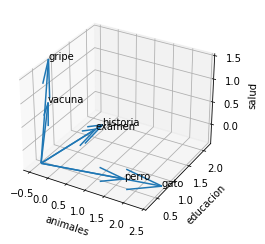

In [10]:
fig = plt.figure()
soa=[np.concatenate(([0,0,0],val)) for val in word_vector.values ]
ax = fig.gca(projection='3d')
X, Y, Z, U, V, W = zip(*soa)
ax.quiver(X, Y, Z, U, V, W)
ax.set_xlim([-0.6, 2.5])
ax.set_ylim([0.2, 2.2])
ax.set_zlim([-0.4, 1.5])
for pos,token in zip(word_vector.values,tokens):
    #print(pos[0],pos[1],pos[2],token)
    ax.text(pos[0],pos[1],pos[2],token)
ax.set_xlabel('animales')
ax.set_ylabel('educacion')
ax.set_zlabel('salud')

como nuestro ejemplo las palabra de los diferentes t√≥picos est√°n bien separados. Estos seis vectores de temas, uno para cada palabra, representan los significados de sus seis palabras como vectores en tres dimensiones.

Si solo calculamos la frecuencia de las apariciones de estas seis palabras y las multiplica por sus pesos, obtendr√° el vector de tema tri-dimensional para cualquier documento. Los vectores 3D nos permiten generar una visualizaci√≥n que puede resultar de ayuda para realizar un an√°lisis exploratorio, adem√°s tambi√©n pueden utilizarse para los problemas de clasificaci√≥n de aprendizaje autom√°tico. Recuerde que:  un algoritmo de clasificaci√≥n lineal divide el espacio vectorial con un plano (o hiperplano) para dividir el espacio en clases. Los documentos del corpus pueden usar muchas m√°s palabras, pero un modelo de vector de tema en particular solo se ver√° influenciado por el uso del conjunto de palabras que definen el tema.

Un modelo basado en t√≥picos solo separa los documentos basado en el n√∫mero de temas, por lo que que no se ve "afectado" por el incrementeo del vocabularioa. En ejmplo se comprimi√≥ una representaci√≥n de 6 dimensi√≥nes a una de 3 (una por cada tema).

El proceso que realizamos est√° principalmente basado en an√°lisis sem√°ntico utilizando nuestra intuici√≥n y el sentido com√∫n para dividir los documentos en temas. Ahora tratemos de poner esa intuici√≥n en un algoritmo que nos permita determinar le n√∫mero de temeas de forma autom√°tica. Si lo analizamos, cada una de las sumas ponderadas que utilizamos son solo un producto escalar (producto punto). Y tres productos punto  es solo una multiplicaci√≥n de matrices o producto interno. Multiplica una matriz de pesos de $3 \times N$ con un vector TF-IDF, donde $N$ es el tama√±o del vocabulario. Se obtine un nuevo vector de tema de 3 x 1 para el documento. Lo que hicimos fue transformar un vector de un espacio vectorial (TF-IDF) a otro espacio vectorial de menor dimensi√≥n (vectores de t√≥picos). Un para generaci√≥n de t√≥picos debe crear una matriz de $N$ t√©rminos por $M$ t√≥picos, la cual utilizaremos para a partir de un vector de frecuencias de palabras de un documento obtener su vecror de t√≥pico correspondiente en dimensi√≥n $M$.

### Pesado de t√≥picos

Deseamos que un algoritmo sea capaz de identificar qu√© palabras van juntas o qu√© significan. El ling√ºista brit√°nico J. R. Firth, estudi√≥ las formas en que se puede estimar lo que significa una palabra o morfema. 
En 1957 le dio una pista sobre c√≥mo calcular los temas para las palabras "Puedes conocer una palabra por las que la acompa√±an" ¬øRecuerda el contexto de los word-embeddings?

Entonces, como determinamos la compa√±ia de una palabra. El enfoque m√°s simple es calcular la matriz de co-ocurrencias como ya lo hicimos con la bolsa de palabras (BOW) y los vectores TF-IDF.  Podemos hacerlo mejor mediate el uso de LSA para analizar la matriz TF-IDF para agrupar palabras en temas. Tambi√©n funciona en vectores de bolsa de palabras, pero los vectores TF-IDF dan usalmente mejores resultados.

Adem√°s LSA tambi√©n permite optimizar los t√≥picos y mantener la diversidad en las dimensiones; por lo que cuando se utiliza el modelo de t√≥picos en lugar del vocabulario originale, se mantiene gran parte del significado (sem√°ntica) de los documentos. El n√∫mero de temas que se requieren para que un modele sem√°ntico capture el significado es mucho menor que la cantidad de palabras en el vocabulario de sus vectores TF-IDF. Por lo tanto, a menudo se hace referencia a LSA como una t√©cnica de reducci√≥n de dimensiones (si conoce PCA, LSA es un PCA sobre representaciones de documentos). 

Dos algoritmos similares a LSA, con aplicaciones de PLN son: Linear discriminant analysis (LDA) y Latent Dirichlet allocation (LDiA). Mientras que LDA descompone un documento en un √∫nico tema. LDiA se parece m√°s a LSA porque puede dividir documentos en tantos temas como desee. 


#### Clasificaci√≥n utilizando LDA

LDA es uno de los modelos de clasificaci√≥n y reducci√≥n de dimensiones m√°s simples y r√°pidos que existen. A pesar de su simplicidad LDA muestra un desempe√±o sobresalinete en muchas aplicaciones, en ocasiones incluso competitiva con  algoritmos del estado del arte. Como LDA es un algoritmo supervisado, requiere las etiquetas/clases de documento. Ahora mostraremos una implementaci√≥n simple que consiste de solo 3 pasos (tomadas de [1]).

1. Calcule la posici√≥n promedio (centroide) de todos los vectores TF-IDF dentro de la clase positiva.
2. Calcule la posici√≥n promedio (centroide) de todos los vectores TF-IDF que no est√°n en la clase negativa.
3. Calcule la diferencia vectorial entre los centroides (el vector que los une).

Todo lo que se requiere para  ‚Äúentrenar‚Äù un modelo LDA es encontrar el vector (l√≠nea) entre los dos centroides para una problema de clasificaci√≥n binaria. Por ejemplo utilicemos los tweets de EmoVal para disitinguir si un texto particular es o no ofensivo. 

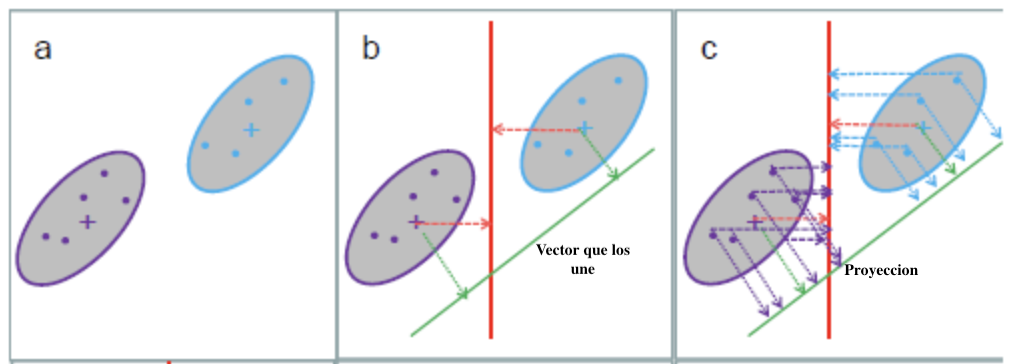

In [11]:
train_df=pd.read_csv('data/train_emo.tsv',sep='\t')
test_df=pd.read_csv('data/dev_emo.tsv',sep='\t') 

In [12]:
train_df

id          event  \
0     a0c1a858-a9b8-4cb1-8a81-1602736ff5b8  GameOfThrones   
1     9b272817-a231-4f68-bdf4-3350d4919330      Venezuela   
2     4bd5b1e5-4b74-440a-82f4-c2567a241011      NotreDame   
3     0bb9d7c9-d781-4684-890e-a94bfb50acc0      NotreDame   
4     88749098-d539-4500-9209-0bbfae2b109c  GameOfThrones   
...                                    ...            ...   
5718  c724c23b-2f6e-46f4-b740-0a7186349f60      Venezuela   
5719  ee10fa89-f6ad-4f61-9bf7-d90604ce5b6b      NotreDame   
5720  c0524970-cd8f-41a6-b9fa-ed052b23c297      Venezuela   
5721  f7b79584-d865-4e86-a83a-159792e98158      NotreDame   
5722  280fab01-6140-42b2-83d7-f9660790f835  GameOfThrones   

                                                  tweet offensive  emotion  
0     La Gran Guerra de #JuegoDeTronos nos ha dejado...        NO   others  
1     El golpe de Estado en #Venezuela est√° m√°s lejo...        NO   others  
2     No tengo una foto en la catedral de #NotreDame...        NO  sadness  
3     #NotreDame nunca llegue a visitar tan grandios...        NO  sadness  
4         A tomar por culo mi crush üò≠üò≠üò≠üò≠üò≠#JuegoDeTronos       OFF  sadness  
...                                                 ...       ...      ...  
5718  #Venezuela Querida, un dictador como Maduro so...        NO   others  
5719  #Notredame Impactantes im√°genes que ha dejado ...        NO  sadness  
5720  ¬°ESCUCHA MADURO! Militares de #USA estar√°n ate...        NO   others  
5721  #NotreDame : üíî üíî üíî Todo es ef√≠mero como el arc...        NO   others  
5722  A otro nivel 8X3 capitulazo La mejor batalla #...        NO      joy  

[5723 rows x 5 columns]

In [13]:
# Generamos un modelo microtc y tranformamos los textos
mtc=TextModel()
datos=[{'text':tweet, 'klass':c} 
       for tweet,c in zip(train_df.tweet,train_df.offensive)]
mtc.fit(datos)
train=mtc.transform(train_df.tweet)
test=mtc.transform(test_df.tweet)

In [14]:
# Usamos un labelencorder
le=LabelEncoder()
le.fit(train_df.offensive)
y=le.transform(train_df.offensive)
yt=le.transform(test_df.offensive)

In [15]:
np.bincount(y)

array([5253,  470])

In [16]:
#Utilizamos un modelo naibe bayes
nb=MultinomialNB()
nb.fit(train,y)
print(f"test f1 score:{f1(yt,nb.predict(test))}, accuracy:{acc(yt,nb.predict(test))}")
print(f"train f1 score:{f1(y,nb.predict(train))}, accuracy:{acc(y,nb.predict(train))}")

test f1 score:0.0, accuracy:0.909952606635071
train f1 score:0.0, accuracy:0.9178752402586057


In [17]:
print(f"test f1 score:{f1(yt,[0 for p in yt])}, accuracy:{acc(yt,[0 for p in yt])}")

test f1 score:0.0, accuracy:0.909952606635071


In [18]:
# El tama√±o del vocabulario
train.shape

(5723, 18489)

Tenemos  18489 palabras en su vocabulario.  En este caso en particular tenemos m√°s del triple de palabras que tweets. Y si lo hacemos por clase la diferencia es peor. Por lo general, como pudo observar un clasificador Naive Bayes no funcionar√° bien cuando su vocabulario es mucho mayor que el n√∫mero de ejemplos etiquetados en su conjunto de entrenamiento. En est√°s circunstancias, podemos echar mano de la t√©cnicas de an√°lisis sem√°ntico. A√∫n cuando `sklearn` ya cuenta con una implementaci√≥n como en este caso, solo es necesario los centroides de cada una de las dos clases binaria (NO, OFF) implementaremos nuestra propia versi√≥n. 

In [19]:
class miLDA:
    def __init__(self,X,y):
        centroid_no = X[y==0].mean(axis=0) # calulamos el centroide para clase no ofensivo
        centroid_off = X[y==1].mean(axis=0) # calulamos el centroide para clase ofensivo
        self.distancia=centroid_off-centroid_no #Calulamos el vector que los une
    def predict(self, data):
        ofensividad=data.dot(self.distancia.transpose()) # calculamos el nivel de ofensa
        probabilidad= MinMaxScaler().fit_transform(ofensividad.reshape(-1,1)) #ajustamos entre 0,1 
        return probabilidad

El vector `ofensividad` es la distancia entre los centroides de los datos ofensivos y no ofensivos. Para deteminar el valor para cada vector TF-IDF en esa l√≠nea entre los centroides utilizaremos el producto escalar, es decir proyectamos cada vector TF-IDF  en la linea. Hacemos el producto de forma matricial, lo cual es m√°s eficiente que utilizar un ciclo. Con la normalizaci√≥n hacemos que el valor de `ofensividad` sea una probabilidad.

In [20]:
lda=miLDA(train,y)
probas=lda.predict(test)

Hacemos la predicci√≥n como ofensivo todos los valores con una probabilidad mayor a 0.5, no ofensivo en caso contrarion

In [21]:
yp=[ p>0.5 and 1 or 0 for p in probas]
ypt=[p>0.5 and 1 or 0 for p in lda.predict(train)]
#Calculamos las m√©tricas
print(f"test f1 score:{f1(yt,yp)}, accuracy:{acc(yt,yp)}")
print(f"train f1 score:{f1(y,ypt)}, accuracy:{acc(y,ypt)}")

test f1 score:0.14634146341463414, accuracy:0.9170616113744076
train f1 score:0.2430939226519337, accuracy:0.9281845186091211


Como puede observar a√∫n cuando la mejora no es sorprendete, si es significativa para un enfoque tan simple como es LDA. Esto muestra la mejora  derivada de los enfoques de an√°lisis sem√°ntico. A diferencia de Naive Bayes, el modelo sem√°ntico no se basa en palabras individuales. El an√°lisis sem√°ntico re√∫ne palabras con sem√°ntica similar (como ofensivas) y las usa todas simultaneamente. Los resultados previos se ver√≠an modificados mediante el ajuste del umbral de probabilidad. 

In [22]:
for u in [0.2,0.3,0.4]:
    yp=[ p>u and 1 or 0 for p in probas]
    ypt=[p>u and 1 or 0 for p in lda.predict(train)]
    print(f"umbral: {u}")
    print(f"train f1 score:{f1(y,ypt)}, accuracy:{acc(y,ypt)}")
    print(f"test f1 score:{f1(yt,yp)}, accuracy:{acc(yt,yp)}")
    print(f"============================")

umbral: 0.2
train f1 score:0.2715905786565862, accuracy:0.5622925039315044
test f1 score:0.26116838487972505, accuracy:0.490521327014218
umbral: 0.3
train f1 score:0.6295907660020986, accuracy:0.9383190634282719
test f1 score:0.47674418604651164, accuracy:0.8933649289099526
umbral: 0.4
train f1 score:0.4065040650406504, accuracy:0.9362222610518959
test f1 score:0.32258064516129026, accuracy:0.9253554502369669


### LDiA 

LDiA (Latent Dirichlet allocation) es otra t√©cnica emparenteada con LSA que puede ser utilizada para generar vectores que capturan la sem√°ntica de una palabra o documento. LDiA utiliza un algoritmo estad√≠stico no lineal para agrupar palabras. Como resultado, generalmente es m√°s lento que los enfoques lineales como LSA. A menudo, esto hace que LDiA sea menos pr√°ctico para muchas aplicaciones del mundo real. No obstante, las estad√≠sticas de los temas son m√°s similares a la intuici√≥n humana. Por lo que, los t√≥picos obtenidos mediante LDiA a menudo ser√°n m√°s f√°ciles de interpretar. Adem√°s LDiA puede usarse para problemas un solo documento, en el cual ser obtendr√≠a un resumen del mismo. El documente genera un corpus, donde cada sentencia es un documento de la colecci√≥n. Esa idea es la que implementa  `gensim` y otros paquetes que proporcionan un modulo para dentificar las oraciones  `centrales` de un documento. Las sentencias obtenidas se pueden unir para crear un resumen generado por una m√°quina. Para la mayor√≠a de los problemas de clasificaci√≥n o regresi√≥n, normalmente es mejor utilizar LSA.

##  An√°lisis sem√°ntico latente (LSA)

LSA se basa en una de las t√©cnicas m√°s antigua y m√°s ampliamente utilizada para la reducci√≥n de dimensiones, la descomposici√≥n de valores singulares (Singular Value Descomposition SVD).  SVD se ha utilizado desde antes de que existiera el aprendizaje autom√°tico. La  t√©cnina consiste en descomponer una matriz en tres matrices cuadradas, una de las cuales es una matriz diagonal.

Una matriz se puede invertir mediante el uso de SVD, la matriz se descompone en tres matrices cuadradas m√°s simples, despues se transponen las matrices y finalmente se multiplican. Es facil imagenes, todas las aplicaciones de un algoritmo que proporciona una forma eficiente para invertir matrices grandes. SVD es ampliamente aplicado a problemas de ingenier√≠a e incluso se utiliza en ciencia de datos para sistemas de recomendaci√≥n basados.

### SVD y LSA

El uso de SVD, perminte dividir una matriz de documentos TF-IDF en tres matrices m√°s simples. Mediante el uso de las matrices obtenidas se pueden recosntruir la matriz original al multiplicarlas. En terminos simples lo que se hace es factorizar un matriz en tres matrices mas simples. Adem√°s la tres matrices obtenidas mediante SVD revelan propiedades de la matriz TF-IDF original que pueden ayudar simplificarla. Por ejemplo, podemos truncar esas matrices (eliminar algunas filas y columnas) antes de volver a multiplicarlas, como resultado se ontend√≠a un modelo de espacio vectorial de menores dimensiones.

El uso de las matrices truncadas no rescontruye exactamente la matriz orinignal, sino m√°s bien es una aproxim√°ci√≥n, la cual es un muchos caso puede resultar mejor que la representaci√≥n original. Lo anterior debido a que la nueva representaci√≥n contiene la `sem√°ntica latente` de los documentos. Debido a lo anterior es que SVD es frecuentemente utilizada en aplicaciones de compresi√≥n. La mejor respresentaci√≥n en es parte debido a que al capturar la escencia se tiene una reducci√≥n del ruido presente en los datos. 

En el caso de PLN, el uso de LSA permite "descubir" la sem√°ntica, o el significado oculto de las palabras.  En este sentidos podemo decir que LSA es una t√©cnica que permite encontrar la transformaci√≥n `√≥ptima` de un conjunto de vectores TF-IDF o BoW. Para muchos problemas de alta dimension la mejor transformaci√≥n es alinear los ejes (dimensiones) en sus nuevos vectores con la mayor "extensi√≥n" es decir los que presentan una mayor varianza en la frecuencia de las palabras. Posteriormente se  pueden eliminar todas las dimensiones en el nuevo espacio vectorial que no contribuye significativamente. Al uso de SVD de esta manera se le conoce como descomposici√≥n de valores singulares truncado (Truncate SVD).

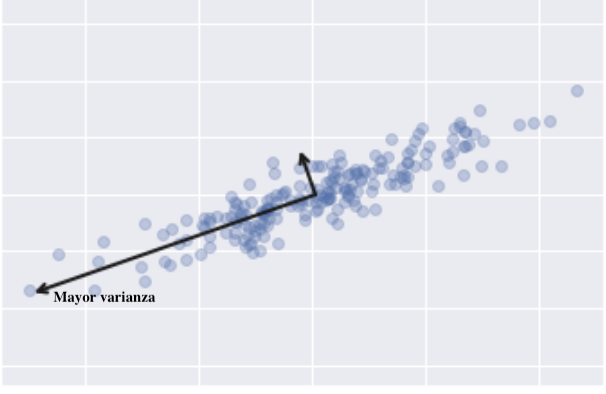

Cuando aplicamos LSA,  SVD se utiliza para encontrar las combinaciones de palabras que juntas, representan la mayor variaci√≥n en los datos. Durante el proceso, los vectores TF-IDF puende ser rotados para que las nuevas dimensiones (vectores base) se alineen con las direcciones de varianza m√°xima. Los ‚Äúvectores base‚Äù representan los ejes del nuevo espacio vectorial y son an√°logos a los vectores de t√≥picos. Cada una de las dimensiones resultantes representan una combinaci√≥n de las frecuencias de palabras en lugar de la frecuencia de una palabra a la vez. En resumen,  las dimensiones resultates son combinaciones ponderadas de palabras que componen los t√≥picos que se utilizan a lo largo de su corpus.

Una m√°quina no es capaz de "entender" lo que significan las combinaciones de palabras, solo aprende que usualmente aparecer juntas. Cuando ve muchas palabras como "perro", "gato" y "iguana", las agrupa en un tema. No sabe que un nombre apropiado para ese t√≥pico podr√≠a ser `mascotas`. Puede incluir muchas palabras como "veterinario" y "arena" en el mismo tema, o incluso palabras que significan lo opuesto entre s√≠. Si ocurren juntos muchos en los mismos documentos, LSA les dar√° puntajes altos para los temas similares. Sin embargo, la descripci√≥n o nombre del tema  depende de la interpretaci√≥n humana. 

El darle un nombre un t√≥pico no es necesario para poder aprovecharlo en diferentes tareas. De igual forma como no no analizamos los miles de dimensiones en los vectores BoW o TF-IDF, no  se tiene que comprender el significado todos sus temas para realizar  operaciones matem√°ticas con esta nueva transformacion. 

LSA  nos permite  identificar las dimensiones del  vector importantes para la sem√°ntica (significado) de los documentos. Por lo que podemos descartar aquellas dimensiones (t√≥picos) que tengan contribuyan poco a la variaci√≥n entre documentos. Si cada documento tiene aproximadamente la misma proporcion de alg√∫n tema y este no ayuda a diferenciar los documentos, entonces podemos deshacernos de √©l. Y eso ayudar√° a generalizar la representaci√≥n vectorial para que funcione mejor cuando la utilicemos con documentos que no son parte del corpus de entrenamiento.

Esta generalizaci√≥n y compresi√≥n que realiza LSA logra lo que intentamos con el uso de las las palabras vac√≠as o derivaciones. Pero la reducci√≥n de la dimensi√≥n LSA es mejor, porque es √≥ptima. Retiene la mayor cantidad de informaci√≥n posible y no descarta ninguna palabra, solo descarta dimensiones (t√≥picos poco relevantes). LSA comprime el significado en menos dimensiones. Solo tenemos que retener las dimensiones de alta varianza, los temas principales de los que habla su corpus en una variedad de formas (con alta varianza). Y cada una de estas dimensiones se convierte en los t√≥picos del corpus, con una combinaci√≥n ponderada de todas las palabras capturadas en cada tema.

### Descomposici√≥n en valores singulares

Como ya mencionamos LSA est√° basado en el uso de descomposici√≥n en valores singulares. Analizaremos el m√©todo mediante un ejemplo. Utilizaremos el poema de **Federico Garc√≠a Lorca** titulado *Cogida y Muerte*, cada consideraremos como un documento cada l√≠nea del poema; colo que obtenemos un total de 30 documentos y un vocabulario de 102 palabras. Note que hemos removido los acentos y signos de puntuaci√≥n. 

In [23]:
## Poema Cogida y Muerte de Federico Garc√≠a Lorca
poema="""a las cinco de la tarde
eran las cinco en punto de la tarde
un ni√±o trajo la blanca sabana a las cinco de la tarde
una espuerta de cal ya prevenida a las cinco de la tarde
lo demas era muerte y solo muerte a las cinco de la tarde
el viento se llevo los algodones a las cinco de la tarde
y el oxido sembro cristal y niquel a las cinco de la tarde
ya luchan la paloma y el leopardo a las cinco de la tarde
y un muslo con un asta desolada a las cinco de la tarde
comenzaron los sones del bordon a las cinco de la tarde
las campanas de arsenico y el humo a las cinco de la tarde
en las esquinas grupos de silencio a las cinco de la tarde
y el toro solo corazon arriba a las cinco de la tarde
cuando el sudor de nieve fue llegando a las cinco de la tarde
cuando la plaza se cubrio de yodo a las cinco de la tarde 
la muerte puso huevos en la herida a las cinco de la tarde.
a las cinco en punto de la tarde
un ataud con ruedas es la cama a las cinco de la tarde
huesos y flautas suenan en su oido a las cinco de la tarde
el toro ya mugia por su frente a las cinco de la tarde
el cuarto se irisaba de agonia a las cinco de la tarde
a lo lejos ya viene la gangrena a las cinco de la tarde
trompa de lirio por las verdes ingles a las cinco de la tarde
las heridas quemaban como soles a las cinco de la tarde
y el gentio rompia las ventanas a las cinco de la tarde
a las cinco de la tarde
ay que terribles cinco de la tarde
eran las cinco en todos los relojes
eran las cinco en sombra de la tarde
"""
#cada linea es un documento
corpus_poema=poema.split('\n')

In [24]:
# Snipet de c√≥digo para obtener el vocabulario
vocabulario={}
for i,doc in enumerate(corpus_poema):
    for word in doc.split():
        vocabulario[word]=vocabulario.get(word,0)+1
voc=list(vocabulario.items())
voc.sort()
terminos=[t for t,c in voc]

In [25]:
# Obtenemo la bolsa de palabras 
BoW=[]
for i,doc in enumerate(corpus_poema):
    tokens={}
    for word in doc.split():
        tokens[word]=1
    BoW.append(tokens)
poema_BoW=pd.DataFrame(BoW).fillna(0).astype(int)

In [26]:
poema_BoW.head() #Dimension 102

a  las  cinco  de  la  tarde  eran  en  punto  un  ...  soles  gentio  \
0  1    1      1   1   1      1     0   0      0   0  ...      0       0   
1  0    1      1   1   1      1     1   1      1   0  ...      0       0   
2  1    1      1   1   1      1     0   0      0   1  ...      0       0   
3  1    1      1   1   1      1     0   0      0   0  ...      0       0   
4  1    1      1   1   1      1     0   0      0   0  ...      0       0   

   rompia  ventanas  ay  que  terribles  todos  relojes  sombra  
0       0         0   0    0          0      0        0       0  
1       0         0   0    0          0      0        0       0  
2       0         0   0    0          0      0        0       0  
3       0         0   0    0          0      0        0       0  
4       0         0   0    0          0      0        0       0  

[5 rows x 102 columns]

In [27]:
wpv=poema_BoW.transpose() 

In [28]:
wpv.head() # La representaci√≥n de cada palabra en terminos de los 30 documentos en la colecci√≥n

0   1   2   3   4   5   6   7   8   9   ...  20  21  22  23  24  25  \
a       1   0   1   1   1   1   1   1   1   1  ...   1   1   1   1   1   1   
las     1   1   1   1   1   1   1   1   1   1  ...   1   1   1   1   1   1   
cinco   1   1   1   1   1   1   1   1   1   1  ...   1   1   1   1   1   1   
de      1   1   1   1   1   1   1   1   1   1  ...   1   1   1   1   1   1   
la      1   1   1   1   1   1   1   1   1   1  ...   1   1   1   1   1   1   

       26  27  28  29  
a       0   0   0   0  
las     0   1   1   0  
cinco   1   1   1   0  
de      1   0   1   0  
la      1   0   1   0  

[5 rows x 30 columns]

#### El m√©todo SVD
SVD permite  descomponer cualquier matriz en tres matrices que pueden utizarse para recoustruir la matriz original. Lo anterior es simalara descomponer un n√∫mero en sus factores primos. Solo que en este caso no se buscan valores escalares, si no m√°s bien 3 matrices de n√∫meros reales. 
Las matrices obtenidas mediante SVD tienen algunas propiedades matem√°ticas √∫tiles que  nos ayudan a realizar unp proceso de reducci√≥n dla reducci√≥n, as√≠ como a identificar los t√≥picos presentes en la colecci√≥n de doucmentos. 

Al aplicarse SVD sobre una matriz de BoW o TF-IDF se encuentran simult√°neamente la correlaci√≥n del uso de t√©rminos entre documentos, as√≠ como la correlaci√≥n que existe entre los documentos del corpus. Adem√°s tambi√©n se determinan las combinaciones lineales de los t√©rminos que presentan la mayor variaza en el corpus. Las combinaciones lineales represeantan lo temas presentes en la colecci√≥n. Los matrices (factores) obtenidos por SVD puden ser utilizados para realizar una transformaci√≥n que resulta en uan reducci√≥n que dimensi√≥n a la vez que se conserva la informaci√≥n sem√°ntica de los documentos SVD agrupa los t√©rminos que tienen una alta correlaci√≥n entre s√≠ (identificado cuales ocurren mucho juntos en los mismos documentos) y tambi√©n var√≠an mucho "juntos" en el corpus.  Los vectores obtenido, son vectores de t√≥pico, el cual puede entenderse como un resumen o generalizaci√≥n de lo que trata el documento.

Ahora pongamos SVD en notaci√≥n matem√°tica:

$$W_{M \times N}=U_{M \times l} S_{l \times l} V_{l \times N}^T,$$

donde $N$ es el tama√±o del vocabulario, $M$ el n√∫mero de documentos en el corpus y $l$ es el n√∫mero de t√≥picos presentes en el corpus (es decir $l=M$), que ser√≠a equivalente al n√∫mero de palabras. Lo que haremos ser√° utilizar las matrices $U, S$ y $V$ para identificar cuales combinaciones de esos t√≥picos son las m√°s `relevantes`.


##### La matrix U

Esta matriz es la m√°s para el proceso de an√°lisis sem√°ntico. La matriz $U$ contiena la relaci√≥n `t√≥pico-t√©rmino` es decir el contexto de las palabras (quienes son su compa√±ia). U es conociada como la matriz de  `vectores singulares izquierdos` porque contiene vectores de fila que deben multiplicarse por la izquierda; $U$ captura la  correlaci√≥n cruzada entre palabras y temas en el mismo documento. Esta matriz podemos tuncarla para reducir el n√∫mero de columnas. Ahora veamos el ejemplo para el poema de Grac√≠a Lorca.

In [29]:
 U, S, Vt = np.linalg.svd(wpv.values)

In [30]:
U.shape #es una matriz cuadrada 

(102, 102)

In [31]:
pd.DataFrame(U, index=wpv.index).round(2)

0     1     2     3     4     5     6     7     8     9    ...  \
a         -0.37 -0.15 -0.14 -0.06 -0.04  0.21 -0.04  0.26  0.06 -0.16  ...   
las       -0.40  0.12  0.06  0.04  0.03 -0.00  0.10  0.15 -0.07  0.02  ...   
cinco     -0.41  0.14  0.03  0.04  0.02 -0.03  0.07 -0.03 -0.03  0.08  ...   
de        -0.40  0.04 -0.06 -0.01 -0.03  0.04 -0.08 -0.09  0.02  0.04  ...   
la        -0.40  0.04 -0.06 -0.01 -0.03  0.04 -0.08 -0.09  0.02  0.04  ...   
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
que       -0.01  0.02 -0.03  0.00 -0.01 -0.03 -0.03 -0.18  0.04  0.07  ...   
terribles -0.01  0.02 -0.03  0.00 -0.01 -0.03 -0.03 -0.18  0.04  0.07  ...   
todos     -0.01  0.10  0.10  0.06  0.05 -0.07  0.15  0.06 -0.04  0.04  ...   
relojes   -0.01  0.10  0.10  0.06  0.05 -0.07  0.15  0.06 -0.04  0.04  ...   
sombra    -0.01  0.09  0.05  0.02  0.01 -0.07  0.00 -0.09 -0.04  0.07  ...   

            92    93    94    95    96    97    98    99    100   101  
a          0.00  0.00 -0.00 -0.00  0.00  0.00  0.00  0.00  0.00  0.00  
las        0.07 -0.04 -0.04 -0.04  0.23  0.23  0.23 -0.17 -0.17  0.11  
cinco     -0.10 -0.07 -0.07 -0.07 -0.08 -0.08 -0.08 -0.17 -0.17  0.05  
de        -0.12 -0.03 -0.03 -0.03  0.01  0.01  0.01  0.14  0.14  0.06  
la         0.25  0.19  0.19  0.19 -0.05 -0.05 -0.05  0.02  0.02 -0.00  
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
que        0.02 -0.01 -0.01 -0.01 -0.26  0.74 -0.26 -0.06 -0.06  0.04  
terribles  0.02 -0.01 -0.01 -0.01 -0.26 -0.26  0.74 -0.06 -0.06  0.04  
todos      0.01  0.02  0.02  0.02 -0.07 -0.07 -0.07  0.78 -0.22  0.00  
relojes    0.01  0.02  0.02  0.02 -0.07 -0.07 -0.07 -0.22  0.78  0.00  
sombra    -0.00 -0.02 -0.02 -0.02  0.03  0.03  0.03  0.04  0.04  0.28  

[102 rows x 102 columns]

La matriz U contiene todos los vectores de tema para cada una de las palabras en el corpus (102x102). Esto permite que  utilizarla para transformar un vector de documento (TF-IDF o BoW) en un vector de documento de t√≥pico. Simplemente multiplicamos la matriz $U$ por cualquier vector de columna de documento de palabra para obtener un nuevo vector documento-t√≥pico.  Esto es posible  debido a que los pesos en $U$ representan la `importancia` de cada palabra para cada tema.

##### Valores singulares $S$
$S$ contiene los t√≥picos ‚Äúvalores singulares‚Äù y es un vector que del tama√±o del vocabulario. Los valores singulares dicen cu√°nta informaci√≥n es capturada por cada dimensi√≥n en su nuevo espacio vectorial sem√°ntico (t√≥pico). Este vector representa una matriz diagonal es decir tiene valores distintos de cero solo a lo largo de la diagonal principal. Al regresar un vector `numpy` ahorra espacio al devolver los valores singulares como un vector

In [32]:
#podemos ver la forma matricial
Sm = np.zeros((len(U), len(Vt)))
pd.np.fill_diagonal(Sm, S)
pd.DataFrame(Sm).round(2)

<ipython-input-32-aa58b518656a>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.fill_diagonal(Sm, S)


0     1     2     3     4    5    6    7    8    9   ...   20   21  \
0    13.14  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1     0.00  3.71  0.00  0.00  0.00  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2     0.00  0.00  3.14  0.00  0.00  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3     0.00  0.00  0.00  3.07  0.00  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4     0.00  0.00  0.00  0.00  2.83  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
..     ...   ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...  ...   
97    0.00  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
98    0.00  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
99    0.00  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
100   0.00  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
101   0.00  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

      22   23   24   25   26   27   28   29  
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
..   ...  ...  ...  ...  ...  ...  ...  ...  
97   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
98   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
99   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
100  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
101  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[102 rows x 30 columns]

La  matriz S para su corpus de 102 palabras y 30 truncado por el n√∫mero de documentos. por lo que despues de las fila 29 solo habr√° ceros. Se requiere una columna para cada documento y una fila para cada palabra. Debido a que a√∫n se ha hecho una reducci√≥n de dimensionalidad,  se tiene tiene tantos t√≥picos como t√©rminos en el vocabulario ($N$), 102 para el ejemplo. Y sus dimensiones (temas) se construyen de manera que la primera dimensi√≥n contenga la mayor cantidad de informaci√≥n ("varianza explicada") sobre el. De esa manera, cuando se trunque el modelo de t√≥picos, puede comenzar a poner a cero las dimensiones en la parte inferior derecha y avanzar hacia arriba y hacia la izquierda. Puede dejar de poner a cero estos valores singulares cuando el error en su modelo de tema comience a contribuir de manera significativa. 

##### Vectores singulares $V^T$ 

La matriz $V^T$ contiene los "vectores singulares derechos" como las columnas de la matriz documento-documento (30x30 para el ejemplo). Esta contiene el significado compartido entre documentos, porque mide la frecuencia con la que los documentos utilizan los mismos temas en el modelo sem√°ntico de los documentos. Tiene el mismo n√∫mero de filas ($l$) y columnas que los documentos.

In [33]:
# Matriz de 30x30 
pd.DataFrame(Vt).round(2)

0     1     2     3     4     5     6     7     8     9   ...    20  \
0  -0.18 -0.16 -0.19 -0.19 -0.20 -0.20 -0.20 -0.21 -0.20 -0.19  ... -0.20   
1   0.04  0.34  0.07  0.02 -0.07 -0.10 -0.25 -0.27 -0.05  0.10  ... -0.13   
2  -0.09  0.17 -0.30 -0.18  0.14 -0.05  0.21  0.16 -0.14 -0.14  ... -0.06   
3   0.00  0.06 -0.18  0.05 -0.32  0.40 -0.06 -0.01 -0.47  0.14  ...  0.29   
4  -0.02  0.02  0.10 -0.39 -0.09  0.29  0.16 -0.16  0.24  0.10  ...  0.18   
5   0.04 -0.18 -0.09 -0.04  0.50  0.04 -0.04 -0.12 -0.18  0.05  ...  0.07   
6  -0.02 -0.01 -0.03  0.18  0.22  0.26  0.00  0.16  0.07  0.44  ... -0.07   
7  -0.05 -0.22  0.08 -0.08 -0.16  0.20 -0.10 -0.02  0.09  0.07  ...  0.06   
8   0.04 -0.11 -0.03 -0.27  0.13  0.12 -0.02 -0.27 -0.07  0.42  ... -0.05   
9   0.01  0.16  0.06 -0.22  0.13 -0.17  0.08 -0.10 -0.07 -0.11  ... -0.09   
10 -0.05  0.09 -0.08 -0.23  0.39  0.10 -0.35 -0.16  0.07 -0.25  ...  0.11   
11 -0.00 -0.08 -0.04 -0.03  0.06 -0.24 -0.06 -0.04  0.03  0.39  ... -0.42   
12 -0.01  0.01 -0.52  0.09  0.00 -0.02  0.16  0.12  0.22 -0.19  ...  0.01   
13  0.00  0.00 -0.69  0.02 -0.05  0.02 -0.08 -0.03  0.03  0.24  ... -0.03   
14  0.03 -0.00 -0.16 -0.01 -0.00 -0.06 -0.05 -0.10 -0.08 -0.16  ...  0.06   
15  0.00  0.02 -0.00  0.56  0.00 -0.10 -0.21 -0.00  0.20  0.04  ... -0.10   
16  0.01  0.01  0.00  0.21  0.06 -0.10  0.70 -0.34 -0.25  0.06  ... -0.02   
17  0.03  0.00 -0.02  0.23  0.09  0.05 -0.31 -0.10 -0.25  0.01  ...  0.20   
18 -0.02 -0.05  0.06  0.34  0.20  0.34  0.04 -0.21 -0.13 -0.30  ... -0.02   
19 -0.00 -0.03 -0.11  0.06 -0.04  0.25  0.10 -0.29  0.58 -0.10  ...  0.04   
20 -0.01 -0.09  0.04 -0.08  0.03  0.44  0.03  0.35 -0.15 -0.21  ... -0.59   
21 -0.01  0.03  0.02 -0.06  0.15 -0.13  0.05  0.53  0.02  0.11  ...  0.39   
22  0.00 -0.00  0.00 -0.00 -0.00  0.00  0.00  0.00 -0.00 -0.00  ... -0.00   
23  0.02  0.17 -0.02 -0.01 -0.42  0.13 -0.03  0.00  0.00  0.02  ... -0.11   
24  0.01  0.39 -0.02 -0.02  0.24  0.23  0.00  0.03  0.04  0.08  ... -0.17   
25 -0.03 -0.22  0.01  0.02 -0.02  0.05 -0.00 -0.01 -0.00  0.06  ... -0.01   
26  0.62 -0.31 -0.08 -0.09 -0.03 -0.02 -0.02  0.02 -0.02 -0.11  ... -0.04   
27 -0.25 -0.60  0.01  0.01  0.02 -0.01  0.01 -0.00  0.01  0.01  ...  0.01   
28  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.00   
29 -0.71  0.00  0.00 -0.00 -0.00 -0.00  0.00  0.00 -0.00 -0.00  ... -0.00   

      21    22    23    24    25    26    27    28   29  
0  -0.19 -0.19 -0.18 -0.20 -0.18 -0.12 -0.07 -0.16  0.0  
1   0.01  0.05  0.06 -0.23  0.04  0.07  0.36  0.32  0.0  
2  -0.16 -0.18 -0.16  0.18 -0.09 -0.10  0.30  0.16  0.0  
3  -0.01  0.05  0.00 -0.05  0.00  0.01  0.18  0.06  0.0  
4  -0.41 -0.20 -0.04  0.13 -0.02 -0.03  0.15  0.03  0.0  
5   0.14 -0.05  0.09 -0.03  0.04 -0.08 -0.19 -0.18  0.0  
6   0.28 -0.20 -0.05  0.00 -0.02 -0.08  0.37  0.01  0.0  
7  -0.16  0.11 -0.15 -0.07 -0.05 -0.44  0.15 -0.21  0.0  
8  -0.19  0.49  0.15 -0.01  0.04  0.10 -0.11 -0.10  0.0  
9  -0.13  0.41  0.02  0.05  0.01  0.16  0.10  0.15  0.0  
10  0.17 -0.08 -0.25 -0.17 -0.05  0.00  0.14  0.10  0.0  
11  0.04 -0.00 -0.02 -0.03 -0.00 -0.25  0.19 -0.07  0.0  
12  0.10  0.53 -0.10  0.05 -0.01 -0.28  0.16  0.01  0.0  
13 -0.10 -0.19  0.05 -0.02  0.00  0.41 -0.19  0.00  0.0  
14 -0.04 -0.16  0.79 -0.01  0.03 -0.40  0.09 -0.01  0.0  
15 -0.56  0.01 -0.04  0.00  0.00  0.01  0.06  0.02  0.0  
16 -0.04 -0.10 -0.20 -0.22  0.01 -0.12 -0.02 -0.00  0.0  
17 -0.06  0.10 -0.31  0.15  0.03 -0.24 -0.16 -0.04  0.0  
18 -0.10  0.13  0.14 -0.04 -0.02  0.16  0.15 -0.00  0.0  
19  0.12 -0.04  0.01 -0.18 -0.00  0.02 -0.08 -0.04  0.0  
20 -0.11  0.05  0.04 -0.13 -0.01  0.10 -0.02 -0.09  0.0  
21 -0.23  0.10  0.05 -0.43 -0.01 -0.03 -0.03  0.03  0.0  
22  0.00 -0.00 -0.00 -0.71  0.00  0.00  0.00 -0.00  0.0  
23  0.30  0.12 -0.04 -0.10  0.02 -0.14 -0.24  0.07  0.0  
24 -0.20 -0.10 -0.03  0.02  0.01 -0.34 -0.46  0.20  0.0  
25  0.03  0.02  0.02 -0.00 -0.03 -0.13 -0.20  0.73  0.0  
26 -0.08 -0.10 -0.13 -0.04  0.62 -0.04  0.09  0.13  

Para convertir una represntaci√≥n BoW o TF-IDF al espacio sem√°ntico la matriz que utilizaremos es $U$ por lo que  $S$ y  $V^T$ solo se utilizar√°n para verificar la precisi√≥n de sus vectores de t√≥pico cuando recostruimos los vectores originales mediante los modelos truncados.

##### SVD - Orientaci√≥n de las Matrices

Si ha realizado aprendizaje autom√°tico con documentos en lenguaje natural antes, puede notar que su matriz de documentos de t√©rminos est√° "volteada" (transpuesta) en relaci√≥n con el formato regresado por acostumbrado a ver en scikit-learn o microtc. Los distintos modelos que hemmos entrenado utilizan como entrada una matriz de documento-t√©rmino. Esta es la orientaci√≥n que requieren los modelos de clasificaci√≥n en scikit-learn. En la atriz de documento-t√©rmino cada fila es un documento y cada columna representaba una palabra o token de esos documentos. Pero cuando hacemos el √°lgebra lineal SVD directamente, su matriz debe transponerse al formato de documento de t√©rmino. Con lo anterior en mente ahora si realizaremos el truncado basado en SVD.

### Truncado utilizando SVD

Con el modelo de t√≥picos obtenido mediante SVD, obtenemos una forma de transformar vectores de frecuencia de palabras en vectores tema. Pero si tenemos tantos temas como palabras, a que tiene tantos temas como palabras, el modelos de t√≥picos tiene tantas dimensiones como el modelo basado en frecuancias. Mediante el uso de SVD se han identificado grupos de palabras nuevas (t√≥picos) que son combinaciones lineales varios terminos, y son estas las que nos permitiran reducir la dimensi√≥n. 

Ignoramos $S$, debido a que las filas y columnas en $U$ ya est√°n organizadas de modo que los temas m√°s importantes (con los valores singulares m√°s grandes) est√°n ordenados de m√°s al menos `importante`. Ahora comencemos a cortar las columnas a la derecha $U$ (las menos imporantes). El problema al que nos enfrentamos ahora es determinar  ¬øCu√°ntos temas ser√°n suficientes para capturar la esencia de un documento? Podemos medir la precisi√≥n de LSA evaluandos con qu√© precisi√≥n se puede reconstruir la matriz  original ($W$) de documentos de t√©rminos a partir de una matriz de documentos de temas truncada. 

In [34]:
error=[]
W=wpv.values
Sm = np.zeros((len(U), len(Vt)))
np.fill_diagonal(Sm, S)
for n in range(len(S), 0, -1):
    Sm[n-1,n-1]=0
    Wr= U.dot(Sm).dot(Vt)
    err=(np.sqrt((Wr-W).flatten()**2).sum()/np.product(W.shape))
    error.append(err)

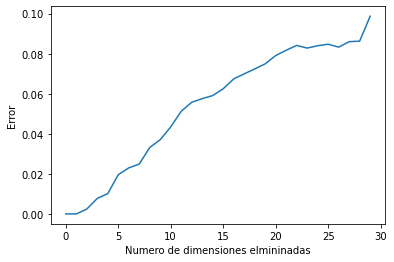

In [35]:
plt.plot(error) # El error se incrementa conforme quitamos topicos
plt.ylabel('Error');
plt.xlabel('Numero de dimensiones elmininadas');

In [36]:
Sm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

El algoritmo SVD detr√°s de LSA perimite agrupar la palabras que se utilizan juntas en mismo tema. As√≠ es como puede obtener una reducci√≥n de dimensionalida. Incluso si no planea utilizar un modelo sem√°ntico dentro de su modelo de PLN, LSA puede ser una excelente manera de comprimir la matrices de documentos para identificar posibles palabras compuestas ($n$-grama).

### An√°lisis de Componentes Principales

El an√°lisis de componentes principales es otro nombre para la SVD cuando se usa para la reducci√≥n de dimensiones, como lo hizo anteriormente para realizar su an√°lisis sem√°ntico latente. Y el modelo PCA en scikit-learn tiene algunos ajustes en las matem√°ticas de SVD que mejorar√°n la precisi√≥n de su modelo PLN. 
An√°lisis de componentes principales (PCA) es una t√©cnica estad√≠stica que se utiliza para reducir la dimensionalidad de los datos. PCA se basa en  la diagonalizaci√≥n de la matriz de covarianza para un conjunto de datos $X$. La matriz de covarianza $\mathit{cov}(X)$
se define como:


$$\mathit{cov} (X) = \frac {1} {n} \Sigma_{i = 1}^n x_i x_i^{T}$$

asumiendo que $E(\bar{x})= \frac {1}{n}\Sigma_{i = 1}^n x_i = 0$. El problema se puede plantear de la siguiente manera:


$$\mathit{cov} \cdot V_j = \lambda V_j$$


donde $\lambda$ son los `eigenvalores` y $V$ son los `eigenvectores`. Al resolver la ecuaci√≥n anterior se genera una base ortonormal para los vectores propios $V_j$ (es decir, componentes principales. Usando $V$ se puede producir una proyecci√≥n en un espacio dimensional inferior $R^{m^\prime}$ (es decir, $m^\prime<m$) con la siguiente ecuaci√≥n.


$$X^\prime = X \lbrack V_1, V_2, \dots, V_{m^\prime} \rbrack$$

#### Ejemplos PCA

Antes de aplicar PCA a vectores TF-IDF revisaremos un par de ejemplos de visualizaci√≥n. Lo ejemplos que presentaremos fueron tomados del libro [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook)

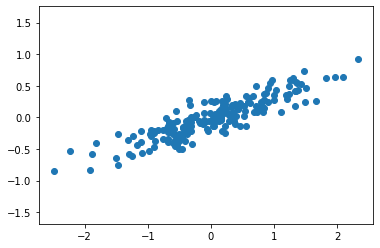

In [72]:
#Generamos un conjunto de datos en R^2 con una varianza dominante en una direcci√≥n
rng = np.random.RandomState(1)
Bp = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(Bp[:, 0], Bp[:, 1])
plt.axis('equal');

En este ejemplo claramente existe una relaci√≥n lineal entre los datos, utilizando PCA determinamos los vectores  ùëâùëó (componentes principales ) que determinan las direcciones en las que la varianza es m√°xima y valores  ùúÜùëó  que nos dicen cuanta varianza se esta explicando y determinan la longitud al cuadrado de los componentes principales.

In [38]:
#Calculamos V_j y \lambda_j
pca = PCA(n_components=2)
pca.fit(Bp)

PCA(n_components=2)

In [39]:
# Para acceder los componentes principales utilizamos .components_
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [40]:
# Para acceder a los valores principales utilizamos 
print(pca.explained_variance_)

[0.7625315 0.0184779]


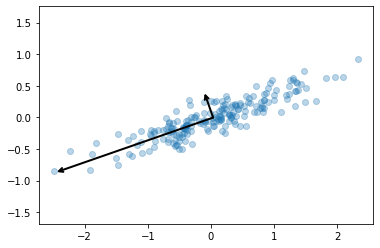

In [41]:
#Representamos los datos y los componentes principales en una misma grafica
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0,color='k')
    ax.annotate('', v1, v0, arrowprops=arrowprops)
# plot data
plt.scatter(Bp[:, 0], Bp[:, 1], alpha=0.3)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

Estos vectores representan los ejes principales de los datos, y la longitud del vector es una medida de que tan `importante` es ese eje para describir la distribuci√≥n de los datos; m√°s precisamente, es una medida de la varianza de los datos cuando se proyectan en ese eje. La proyecci√≥n de cada punto de datos sobre los ejes principales son los "componentes principales" de los datos.

El uso de PCA para la reducci√≥n de dimensionalidad implica volver cero uno o m√°s de los componentes principales m√°s peque√±os, lo que da como resultado una proyecci√≥n de menor dimensi√≥n de los datos que conserva la varianza m√°xima en los datos.

Siguiendo con nuestro  ejemplo de PCA como una transformaci√≥n de reducci√≥n de dimensionalidad:

In [42]:
pca = PCA(n_components=1)
pca.fit(Bp)
Bp_pca = pca.transform(Bp)
print("dimensi√≥n original:   ", Bp.shape)
print("dimensi√≥n reducida:", Bp_pca.shape)

dimensi√≥n original:    (200, 2)
dimensi√≥n reducida: (200, 1)


Los datos transformados se han reducido a una √∫nica dimensi√≥n. Para comprender el efecto de esta reducci√≥n de dimensionalidad, podemos realizar la transformaci√≥n inversa de estos datos reducidos y trazarlos junto con los datos originales:

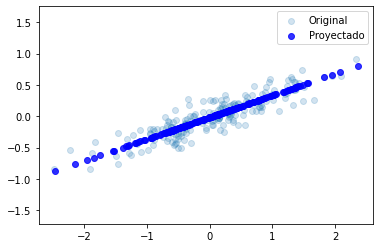

In [43]:
Bp_new = pca.inverse_transform(Bp_pca)
plt.scatter(Bp[:, 0], Bp[:, 1], alpha=0.2, label='Original')
plt.scatter(Bp_new[:, 0], Bp_new[:, 1], alpha=0.8,color='b',label='Proyectado')
plt.axis('equal');
plt.legend()

Los puntos m√°s claros son los datos originales, mientras que los puntos oscuros son la versi√≥n proyectada. Esto hace evidente lo que significa una reducci√≥n de dimensionalidad de PCA: la informaci√≥n a lo largo del eje o ejes principales menos importantes se elimina, dejando solo el (los) componente (s) de los datos con la varianza m√°s alta.
La fracci√≥n de varianza que se corta (proporcional a la extensi√≥n de puntos alrededor de la l√≠nea formada en esta figura) es aproximadamente una medida de cu√°nta "informaci√≥n" se descarta en esta reducci√≥n de dimensionalidad.

Este conjunto de datos de dimensi√≥n reducida es, en algunos sentidos, "lo suficientemente bueno" para codificar las relaciones m√°s importantes entre los puntos: a pesar de reducir la dimensi√≥n de los datos en un 70%, la relaci√≥n general entre los puntos de datos se conserva en su mayor√≠a.

#### PCA para visualizaci√≥n

La utilidad de la reducci√≥n de dimensionalidad puede no ser del todo evidente en solo dos dimensiones, pero se vuelve mucho m√°s clara cuando se observan datos de alta dimensi√≥n. Para ver esto, utilizaremos PCA para reducir la dimensionalidad  en los  datos de **d√≠gitos** presentes en sklearn

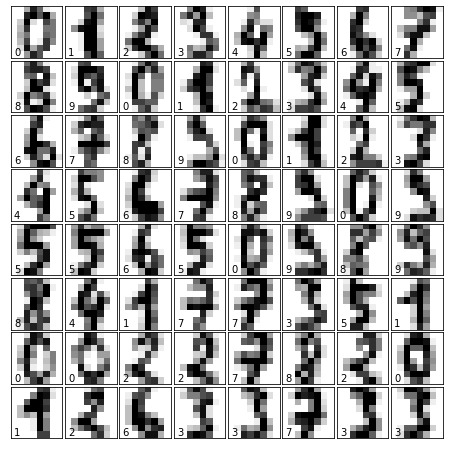

In [44]:
from sklearn.datasets import load_digits
digits = load_digits()
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

Este conjuntos consta de $1797$ im√°genes de d√≠gitos escritos a mano cada una de tama√±o $8\times8$ pixeles es decir cada imagen consta de $64$ pixeles y para este ejecicio representaremos cada imagen como un vector $\vec{X} \in \Bbb{R}^{64}$ estos vectores estan almacenados en **digits.data**

In [45]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


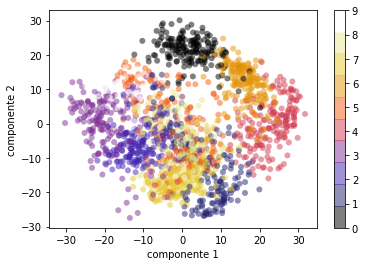

In [46]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('CMRmap', 10))
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.colorbar();

#### Elegir el n√∫mero de componentes
En la pr√°ctica una parte importante del uso de PCA es la capacidad de elegir cu√°ntos componentes se necesitan para describir los datos. Esto se puede determinar observando la raz√≥n de varianza explicada acumulada en funci√≥n del n√∫mero de componentes:

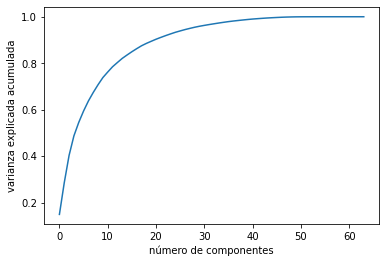

In [47]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('n√∫mero de componentes')
plt.ylabel('varianza explicada acumulada');

In [48]:
np.cumsum(pca.explained_variance_ratio_)

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

Esta curva cuantifica qu√© parte de la varianza total de las 64 dimensiones est√° contenida dentro de los primeros  ùëÅ  componentes. Por ejemplo, vemos que con estos datos, los primeros 10 componentes contienen aproximadamente el 75% de la varianza, mientras que se necesita alrededor de 50 componentes para describir cerca del 100% de la varianza.

Aqu√≠ vemos que nuestra proyecci√≥n bidimensional pierde mucha informaci√≥n (medida por la varianza explicada) y que necesitar√≠amos alrededor de 20 componentes para explicar el 90% de la varianza. La gr√°fica resultante para un conjunto de datos de dimensiones altas puede ayudarnos a comprender el nivel de redundancia presente en m√∫ltiples observaciones.

### PCA-SVD y PLN

Ahora apliquemos  SVD sobre el ejemplo del poema, encontraremos los componentes principales que emergen del uso de  SVD. El vocabulario y la variedad de temas seran muy peque√±os. As√≠ que reduciremos  el n√∫mero de temas a 5. Utilizarermos tanto la implementaci√≥n de PCA como el modelo truncado de SVD para evaluar si hay diferencias.

El modelo SVD truncado est√° dise√±ado para trabajar con matrices dispersas. Lo cual lo hace ideal para trabajar con representaciones basadas en frecuencia. Tenga en mente que cuando utilice la versi√≥ de PCA de scikit-learn deber√° generar las matrices densas equivalentes. 

#### PCA para an√°lisis sem√°ntico

Probemos primero el modelo PCA de `scikit-learn`. Ya lo hemos utilizado sobre el data set de digitos; ahora vamos a utilizarlo sobre los los vectores de nuestro poema:

In [49]:
# Obtenemos cada uno de los 30 documentos en el espacio modelado por 5 t√≥picos
pca=PCA(n_components=5)
pca = pca.fit(W.transpose())
topicos = ['topic{}'.format(i) for i in range(pca.n_components)]
vectores_de_topicos_pca=pca.transform(W.transpose())
pd.DataFrame(vectores_de_topicos_pca,columns=topicos)

topic0    topic1    topic2    topic3    topic4
0   0.041863  0.312928 -0.079482  0.068620 -0.043153
1   1.139798 -0.309220  0.182953  0.156010 -0.222328
2   0.021998  1.072042  0.161222 -0.393521  0.077773
3  -0.113767  0.539783 -0.286545  0.945055  0.626759
4  -0.454761 -0.090677  1.034643  0.099222  0.092539
5  -0.421464 -0.307857 -1.197515 -0.520217 -0.640460
6  -0.964933 -0.714849  0.278720 -0.504244  0.015163
7  -1.051041 -0.597052  0.109204  0.246505  0.571937
8  -0.429154  0.789043  1.064646 -0.969643  0.296081
9   0.197566  0.346780 -0.476801 -0.152387 -0.211613
10 -0.894549 -0.612769  0.236225 -0.406239  0.011816
11  0.506930  0.132417  0.265480  0.419526 -0.656949
12 -1.066105 -0.789484  0.364938 -0.191317  0.235575
13 -0.564879 -0.128203 -0.846012 -0.215243 -0.510470
14 -0.071773  0.506908 -0.814340 -0.147963 -0.799814
15  0.912258 -0.176166  0.620152  0.536622 -0.874505
16  0.514947  0.068653  0.224820  0.323930 -0.489774
17 -0.012773  1.444047  0.430114 -0.826944  0.225569
18  0.033950 -0.514286  1.267372  0.570807 -0.689972
19 -0.831077 -0.357345 -0.555364  1.197895  0.685410
20 -0.553595 -0.158131 -0.909244 -0.288817 -0.547300
21 -0.149548  0.524677 -0.100423  0.968992  0.652977
22 -0.011236  0.554250 -0.288471  0.558584  0.142513
23  0.055039  0.521448 -0.136674  0.134837 -0.092058
24 -0.894549 -0.612769  0.236225 -0.406239  0.011816
25  0.041863  0.312928 -0.079482  0.068620 -0.043153
26  0.637144  0.101536 -0.294222 -0.276509  0.777391
27  2.035344 -1.087430 -0.216433 -0.517976  0.430100
28  1.107019 -0.316846  0.156686  0.110674 -0.147318
29  1.239484 -0.454353 -0.352393 -0.588639  1.115449

Si queremos conocer cuales son los t√≥picos, podemos identificarlo con el peso de la influencia que tiene  cada palabra en cada uno de los t√≥picos. Cada uno de los t√©rminos del vocabulario se coresponde con cada una de las dimensiones de la matriz de tema-palabra. La podemos obtner como sigue: 

In [50]:
pesos = pd.DataFrame(pca.components_, columns=terminos, index=['topic{}'.format(i) for i in range(5)])

In [51]:
pesos # Podemos identificar que peso tiene cada palabra en cada topico

a    agonia  algodones    arriba  arsenico      asta     ataud  \
topic0 -0.368580 -0.112309  -0.074178 -0.195986 -0.195986 -0.250581  0.256271   
topic1  0.206573  0.035272   0.045422  0.154134  0.154134  0.171746 -0.171301   
topic2  0.054756  0.067645   0.036865  0.059507  0.059507 -0.005369  0.012889   
topic3  0.137069  0.106217   0.072269  0.135862  0.135862  0.069980 -0.030852   
topic4 -0.259418 -0.251389  -0.148143 -0.205265 -0.205265 -0.089122  0.008029   

              ay    blanca    bordon  ...    trompa        un       una  \
topic0  0.374053  0.099030 -0.025131  ...  0.003294 -0.053535 -0.053535   
topic1 -0.220225 -0.024050  0.330419  ...  0.052130 -0.061259 -0.061259   
topic2  0.261643  0.042659  0.173239  ... -0.014298  0.024713  0.024713   
topic3  0.196387  0.058924 -0.268886  ...  0.016554 -0.049875 -0.049875   
topic4 -0.352047 -0.094575  0.079610  ... -0.012226  0.001569  0.001569   

        ventanas    verdes     viene    viento         y        ya      yodo  
topic0 -0.053535  0.038131  0.038131  0.038131  0.121808  0.121808  0.066251  
topic1 -0.061259  0.010151  0.010151  0.010151 -0.108712 -0.108712 -0.031676  
topic2  0.024713 -0.030780 -0.030780 -0.030780 -0.022642 -0.022642  0.016392  
topic3 -0.049875 -0.033948 -0.033948 -0.033948 -0.063593 -0.063593  0.013588  
topic4  0.001569  0.103246  0.103246  0.103246  0.057122  0.057122 -0.019565  

[5 rows x 102 columns]

revisemos los pesos para los terminos que m√°s se repite en el documento `eran las cinco de la tarde`

In [52]:
pesos['eran las cinco de la tarde'.split()]

eran       las     cinco        de        la     tarde
topic0  0.108408 -0.053535  0.001317  0.027379 -0.053535 -0.000672
topic1 -0.104821 -0.061259  0.107174 -0.026677 -0.061259  0.055409
topic2 -0.197799  0.024713  0.016866  0.173115  0.024713 -0.030178
topic3 -0.146171 -0.049875 -0.048314  0.078064 -0.049875  0.068579
topic4 -0.056042  0.001569  0.010329 -0.103853  0.001569  0.018927

podemos ver que los t√≥pico 0 es el unico positivo a `eran`mientras que todos los dem√°s tiene un peso negativo. 

#### SVD truncado para an√°lisis sem√°ntico

Ahora aplicaremos TruncateSVD implementado en `scikit-learn`. Este es un enfoque m√°s directo de LSA que pasa por alto el modelo scikit-learn PCA para que pueda ver lo que est√° sucediendo dentro del contenedor PCA. Puede manejar matrices dispersas, por lo que si se est√° trabajando con grandes conjuntos de datos, deber√≠a preferir el uso de SVD sobre PCA. Midiante el uso de  TruncatedSVD se divide la matriz TF-IDF en las 3 matrices $U$, $S$ y $Vt$ y posteriormente descartar√°s las dimensiones que contienen menos informaci√≥n. Las dimensiones desechadas representan los t√≥picos que presentan la menor varianza en el corpus. Ahora utilizaremos TruncateSVD para retener los 5 t√≥picos m√°s relevantes.

In [53]:
from sklearn.decomposition import TruncatedSVD

In [54]:
svd = TruncatedSVD(n_components=5, n_iter=100)
vectores_de_topicos_svd = svd.fit_transform(W.transpose())
pd.DataFrame(vectores_de_topicos_svd ,columns=topicos)

topic0    topic1    topic2    topic3    topic4
0   2.354070  0.166391  0.290971 -0.005070  0.052810
1   2.131630  1.252414 -0.534702 -0.197733 -0.069163
2   2.454526  0.273914  0.932424  0.541457 -0.280962
3   2.471244  0.066561  0.570697 -0.141411  1.111312
4   2.594768 -0.261708 -0.429625  0.971851  0.242246
5   2.617096 -0.356633  0.141862 -1.234750 -0.831682
6   2.677544 -0.935870 -0.653007  0.173694 -0.449188
7   2.722778 -1.001303 -0.488820  0.034684  0.445831
8   2.595355 -0.175158  0.436445  1.436632 -0.674372
9   2.445590  0.373867  0.427152 -0.414381 -0.280496
10  2.661769 -0.848899 -0.557576  0.146538 -0.359693
11  2.483752  0.863241 -0.174074 -0.021012  0.074287
12  2.708773 -1.039007 -0.745119  0.233817 -0.061900
13  2.581378 -0.497399  0.206785 -0.814776 -0.420355
14  2.470622  0.108741  0.703790 -0.680069 -0.447557
15  2.129851  1.085309 -0.583601  0.208457  0.182000
16  2.467240  0.826091 -0.195171 -0.039557  0.043266
17  2.484631  0.285187  1.215088  0.991404 -0.597385
18  2.656170  0.442391 -1.117687  0.695453  0.232975
19  2.674916 -0.744983 -0.108561 -0.647409  1.314325
20  2.581590 -0.482977  0.195673 -0.892602 -0.522697
21  2.486621  0.039748  0.497166  0.038686  1.171585
22  2.440188  0.176318  0.568974 -0.158100  0.575595
23  2.409874  0.234579  0.490173 -0.008829  0.105367
24  2.661769 -0.848899 -0.557576  0.146538 -0.359693
25  2.354070  0.166391  0.290971 -0.005070  0.052810
26  1.620459  0.248633  0.311835 -0.035942  0.073676
27  0.964090  1.342319 -0.937230 -0.539341 -0.438670
28  2.117264  1.187677 -0.512631 -0.193022 -0.075327
29  0.000000  0.000000  0.000000 -0.000000  0.000000

### Utilizando SVD truncado para an√°lisis sem√°ntico

Ahora apliquemos SVD truncado al problema de clasificaci√≥n de tweets ofensivos. Para este ejemplo truncaremos a 64 t√≥picos. 

In [55]:
tindex=[f"tweet{i}{label}" for i,label in enumerate(train_df.offensive)]
svdt = TruncatedSVD(n_components=64, n_iter=100)
vectores_de_topicos = svdt.fit_transform(train)
vectores_de_topicos=pd.DataFrame(vectores_de_topicos, columns=['topico{}'.format(i) for i in range(64)],
            index=tindex)

In [56]:
vectores_de_topicos.head()

topico0   topico1   topico2   topico3   topico4   topico5  \
tweet0NO   0.113448 -0.033201 -0.004760  0.008052  0.064479 -0.021550   
tweet1NO   0.091304 -0.005309 -0.013427  0.007266 -0.008280 -0.002663   
tweet2NO   0.128408 -0.057183 -0.027183 -0.075221  0.008287 -0.073538   
tweet3NO   0.063541 -0.023611 -0.015594 -0.042691 -0.011792 -0.021914   
tweet4OFF  0.046615 -0.019302 -0.003346  0.003421 -0.004024  0.007718   

            topico6   topico7   topico8   topico9  ...  topico54  topico55  \
tweet0NO  -0.006759 -0.007805  0.025515 -0.047353  ...  0.052245  0.043339   
tweet1NO  -0.022436  0.077071 -0.038154 -0.054791  ... -0.022539  0.038096   
tweet2NO  -0.093397 -0.038966 -0.034188  0.018685  ... -0.049277  0.023124   
tweet3NO  -0.043265 -0.017393 -0.005457  0.001817  ...  0.010266 -0.057267   
tweet4OFF  0.015796 -0.019871  0.000607  0.016499  ... -0.017851  0.003201   

           topico56  topico57  topico58  topico59  topico60  topico61  \
tweet0NO   0.032350 -0.017145 -0.020971  0.026421  0.011472 -0.020343   
tweet1NO   0.004131  0.014210 -0.014291  0.022881 -0.016431 -0.006133   
tweet2NO   0.000478  0.060741 -0.036728  0.003445  0.082824 -0.035812   
tweet3NO   0.015444  0.001197 -0.004776 -0.050215 -0.005569 -0.062206   
tweet4OFF  0.007512 -0.007299 -0.004863  0.004376  0.008580 -0.012062   

           topico62  topico63  
tweet0NO   0.000547  0.013731  
tweet1NO  -0.020160 -0.030165  
tweet2NO  -0.005624 -0.001037  
tweet3NO  -0.025028  0.023402  
tweet4OFF  0.001303  0.029594  

[5 rows x 64 columns]

Una vez que obtenemos los t√≥picos podemos tener una idea de que tan bien funcionara el modelo sem√°ntico para clasificaci√≥n revisando que tan correlacionado est√° la similitu coseno con la pertenencia a la misma clase.

In [57]:
vectores_de_topicos_norm=(vectores_de_topicos.T / np.linalg.norm(vectores_de_topicos, axis=1)).T

In [58]:
vectores_de_topicos_norm.iloc[[0,1,3,4,15,20,40]].dot(vectores_de_topicos_norm.iloc[[0,1,3,4,15,20,40]].T).round(1)

tweet0NO  tweet1NO  tweet3NO  tweet4OFF  tweet15OFF  tweet20OFF  \
tweet0NO         1.0       0.2       0.1        0.0         0.1        -0.1   
tweet1NO         0.2       1.0       0.0       -0.1         0.1        -0.0   
tweet3NO         0.1       0.0       1.0        0.1         0.2         0.1   
tweet4OFF        0.0      -0.1       0.1        1.0         0.1         0.0   
tweet15OFF       0.1       0.1       0.2        0.1         1.0         0.2   
tweet20OFF      -0.1      -0.0       0.1        0.0         0.2         1.0   
tweet40OFF      -0.0       0.0      -0.0        0.1         0.0         0.0   

            tweet40OFF  
tweet0NO          -0.0  
tweet1NO           0.0  
tweet3NO          -0.0  
tweet4OFF          0.1  
tweet15OFF         0.0  
tweet20OFF         0.0  
tweet40OFF         1.0

De la peque√±a muestra podr√≠amos tener un poco de evidencia que la similitud tienen a ser mayor entre tweets de la misms clases. La  b√∫squeda sem√°ntica puede usar la similitud de coseno entre un vector de consulta y todos los vectores de tema en la base de datos de documentos para encontrar el m√°s similar sem√°nticamente. Desafortunadamente, esta similitud entre los vectores de temas dentro de cada clase, muy probablmente  no se mantenga para todos los tweets. Por lo que definir una frontera lineal entre ambas clases ser√≠a dif√≠cil para este conjunto de vectores tem√°ticos. Resulta dif√≠cil establecer un umbral en la similitud que asegure que siempre se puedan clasificar correctamente los tweets. Pero, en general, si el espcacio sem√°ntico es representativo cuanto m√°s contenido ofensivo tenga un tweet, menos similar ser√° de otro que no lo sea. Si se cumple lo anterior podr√≠amos crear un sistema que discrimime correctamente las clases implicadas. 

Cuando utilicemos SVD truncado es buena idea normalizar los vectores de frecuencia (dividiendolos por su norma) y centrarlos substrayendo la frecuencia media de cada t√©rmino.

### Alternativas a LSA/SVD

El √©xito de la descomposici√≥n de valores singulares para el an√°lisis sem√°ntico y la reducci√≥n de dimensiones ha motivado el desarrollo de algorimtos mejorados. Aun cuando las mejoras estan enfocadas en problemas que no son  PLN, nada impidide que puedan utilizarse con ese pr√≥posito. Por lo tanto, puedes resultar de utilidad para el an√°lisis sem√°ntico. Algunos de lo m√©todos reportados son:

- **Quadratic discriminant analysis (QDA)**. A diferencia de LDA, QDA realiza una transformaci√≥n cuadr√°tica. Esta transformaci√≥n define un espacio vectorial que puede ser utilizado para discriminar entre diferentes clases. 
- **Poryecci√≥n aleatoria**. Es una t√©cnica de descomposici√≥n/transformaci√≥n  similar a SVD, pero el algoritmo es estoc√°stico, por lo que diferentes ejecuaciones obtienen diferente respuesta. Su naturaleza estoc√°stica facilita su implementaci√≥n en paralelo. Y en algunos casos (para algunas de esas ejecuciones aleatorias), puede obtener transformaciones que son mejores que las obtenidas mediante de SVD. 
- **Factorizaci√≥n matricial no negativa (NMF)**. Es una familia de algoritmos para la factorizaci√≥n de matrices. NMF tiene la particularidad de que los factores obtenidos no tienen elementos negativos. Esta no negatividad hace que las matrices resultantes sean m√°s f√°ciles de inspeccionar. 

## Latent Dirichlet allocation (LDiA)

A√∫n cuado LSA debar√≠a ser la primera opci√≥n para la mayor√≠a de modelos de t√≥picos, b√∫squeda sem√°ntica o motores de recomendaciones basados en contenido. LDiA puede dar resultados mejores en algunas situaciones.
LDiA es similar a LSA, pero a diferencia de LSA, LDiA asume que las frecuencias de terminos tienen una distribuci√≥n de Dirichlet.

LDiA crea un modelo de espacio vectorial sem√°ntico utilizando un enfoque mas similar a como lo har√≠a una persona utilizando su intuici√≥n. La combinaci√≥n de temas de un documento se determina mediante la combinaci√≥n de palabras en cada t√≥pico seg√∫n el tema al que se asignaron esas palabras. Lo anterior hace que un modelo LDiA sea mucho m√°s f√°cil de interpretar, porque las palabras asignadas a los temas y los temas asignados a los documentos tienden a tener m√°s sentido que para los modelos LSA. 

LDiA asume que cada documento es una combinaci√≥n lineal de un n√∫mero arbitrario de temas los cuales se seleccionan para entrenar el modelo LDiA. LDiA tambi√©n asume que cada tema puede ser representado por una distribuci√≥n de palabras (frecuencias de tokens). Se parte de la idea de que la probabilidad o el peso de cada uno los temas sea parte de un documento, as√≠ como de la probabilidad de que una palabra sea asignada a un tema est√°n definidad por una distribuci√≥n de probabilidad de Dirichlet.

### LDiA para modelado de t√≥picos

Como ya hemos mencionado los temas determinado utilizando LDiA tienden a ser m√°s comprensibles para los humanos. Esto se debe a que a las palabras que aparecen juntas con frecuencia se les asignan a los mismos temas, tal y como lo esperariamos. Por otro lado, LSA intenta mantener la separaci√≥n(varianza) entre los datos, mientras que LDiA intenta mantener unidos los t√©rminos que est√°n unidos en el corpus. Las dos estrategias optimizan cosas diferentes  Para mantener juntos los vectores de alta dimensi√≥n en el espacio de dimensi√≥n inferior, LDiA tiene deformar  el espacio (y los vectores) de formas no lineales.

Ahora apliquemos LDiA al conjunto de datos de EmoEval, etiquetados como ofensivos y no ofensivos. Primero calcularemos los vectores de frecuencia y luego algunos vectores de temas para cada tweet en el corpus. Asumimos el uso 16 topicos. Mantener un n√∫mero bajo de temas (dimensiones) puede ayudar a reducir el sobre-aprendizaje. 
Dado que LDiA utiliza vectores  BoW sin procesar en lugar de vectores TF-IDF normalizados. Calcularemos los vectores BOW usando scikit-learn. 


In [59]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import casual_tokenize
np.random.seed(3)
counter = CountVectorizer(tokenizer=casual_tokenize)

In [60]:
vsm=counter.fit_transform(raw_documents=train_df.tweet)
cols_num,terms_bow=zip(*sorted(zip(counter.vocabulary_.values(), counter.vocabulary_.keys())))
tweets_bows=pd.DataFrame(vsm.toarray(),index=tindex, columns=terms_bow)

In [61]:
tweets_bows.head()

!  "  #  ##fridaysforfuture  #10  #100  #11delajornada  #15abr  \
tweet0NO   0  0  0                   0    0     0               0       0   
tweet1NO   0  0  0                   0    0     0               0       0   
tweet2NO   0  0  0                   0    0     0               0       0   
tweet3NO   0  0  0                   0    0     0               0       0   
tweet4OFF  0  0  0                   0    0     0               0       0   

           #15demarzo  #15demayo  ...  üßÄ  üßê  üßü  üß§  üß™  Û†Å¢  Û†Å•  Û†Åß  Û†ÅÆ  Û†Åø  
tweet0NO            0          0  ...  0  0  0  0  0  0  0  0  0  0  
tweet1NO            0          0  ...  0  0  0  0  0  0  0  0  0  0  
tweet2NO            0          0  ...  0  0  0  0  0  0  0  0  0  0  
tweet3NO            0          0  ...  0  0  0  0  0  0  0  0  0  0  
tweet4OFF           0          0  ...  0  0  0  0  0  0  0  0  0  0  

[5 rows x 18953 columns]

In [62]:
# Revisamos los diferentes de 0
tweets_bows.loc['tweet0NO'][tweets_bows.loc['tweet0NO']>0]

#juegodetronos             1
cuantas                    1
de                         1
dejado                     1
dudas                      1
el                         1
gran                       1
guerra                     1
ha                         1
https://t.co/oo3tjur34c    1
https://t.co/ue7lcglsez    1
la                         1
momentos                   1
muchos                     1
nos                        1
para                       1
recuerdo                   1
unas                       1
y                          1
Name: tweet0NO, dtype: int64

Ahora utilicemos LDiA sobre el corpus de entrenamiento

In [63]:
from sklearn.decomposition import LatentDirichletAllocation as LDiA
np.random.seed(3)
ldia = LDiA(n_components=16).fit(tweets_bows)

In [64]:
# verificamos  la dimension
ldia.components_.shape

(16, 18953)

El modelo resultante asigno  18953 tokens en 16 t√≥picos (componentes). Ahora revisaremos algunas palabras y c√≥mo se asignan los pesos en cada uno de los 16 temas. Dado que LDiA es un algoritmo estoc√°stico diferentes corridas obtendr√°n diferentes resultados. Por lo tanto, los pesos de las palabras y los temas ser√°n diferente en cada ejecuci√≥n, pero deber√≠an tener magnitudes similares. Para prevenir resultados diferentes podemos establecer una la semilla en un valor fijo. 

In [65]:
componentes = pd.DataFrame(ldia.components_.T, index=terms_bow, columns=['topico{}'.format(i) for i in range(16)])

In [66]:
componentes.head().round(2)

topico0  topico1  topico2  topico3  topico4  topico5  \
!                    446.20   193.94    89.73     0.06   153.15     0.39   
"                    160.22    12.49   131.94     0.06     6.40     0.06   
#                      3.06     0.06     1.06     0.06     2.00     0.06   
##fridaysforfuture     0.06     0.06     0.06     0.06     0.06     0.06   
#10                    0.06     0.06     0.06     0.06     0.06     0.06   

                    topico6  topico7  topico8  topico9  topico10  topico11  \
!                    172.55     3.38     3.16    25.72      0.06     86.77   
"                     73.59    31.86     1.47     0.33      0.06      0.06   
#                      0.06     0.06     0.06     0.06      0.06      0.06   
##fridaysforfuture     0.06     0.06     0.06     0.06      0.06      0.06   
#10                    0.06     0.06     1.06     0.06      0.06      0.06   

                    topico12  topico13  topico14  topico15  
!                     203.58      2.31      0.06    217.93  
"                      15.79     85.08      0.06    117.52  
#                       2.12      0.06      0.06      0.06  
##fridaysforfuture      1.06      0.06      0.06      0.06  
#10                     0.06      0.06      0.06      0.06

El signo de excalmaci√≥n (!) esta presente en todos los t√≥picos, adem√°s tiene un peso fuerte en la mayoria de los temas, mientras que ne lo t√≥picos 3,5 10 y 14. Note que en el tema 13  el signo de exclamaci√≥n tiene un peso mucho menor que el simbolo de ("), lo cual podr√≠a implicar que el t√≥pico 13 es m√°s acerca del n√∫mero de citas que de la intensidad con que se expresa el sentimiento.

In [67]:
componentes.topico13.sort_values(ascending=False)[:15]

,               205.679036
.               144.839363
que             138.037537
la              127.142794
#diadellibro    100.612332
de               94.842246
un               87.954869
en               85.711399
"                85.082416
no               83.688275
libro            76.932587
y                76.808359
#d√≠adellibro     68.988267
el               68.987252
los              65.703620
Name: topico13, dtype: float64

Podemos ver que lo 15 tokens principales para el tema 13 son palabras relacionada con libros, los cuales est√°n relacionados con citas. Ser√≠a interesante saber si este se utiliza mas o menos mensajes ofensivos, o en algunas de las emociones. Puede ver que la asignaci√≥n de palabras a los temas se puede racionalizar o razonar, incluso un vistazo r√°pido a los terminos.
Ahora vamos a porbar como utilizar estos vectores para la tarea de clasificaci√≥n utilizando LDA. Para utilizar LDA primero debemos transformar todos los documentos tweets al espacio sem√°ntico.

In [68]:
train_ldia16 = ldia.transform(tweets_bows)
test_tweets_bows=counter.transform(test_df.tweet)
test_ldia16=ldia.transform(test_tweets_bows)

In [69]:
pd.DataFrame(train_ldia16,index=tindex) # cada tweet en el espacio semantico de 16 temas

0         1         2         3         4         5   \
tweet0NO     0.003125  0.003125  0.003125  0.003125  0.003125  0.003125   
tweet1NO     0.003289  0.003289  0.003289  0.003289  0.003289  0.003289   
tweet2NO     0.003676  0.003676  0.705260  0.003676  0.003676  0.003676   
tweet3NO     0.003472  0.003472  0.755920  0.003472  0.003472  0.003472   
tweet4OFF    0.005682  0.005682  0.005682  0.005682  0.005682  0.005682   
...               ...       ...       ...       ...       ...       ...   
tweet5718NO  0.656735  0.001645  0.001645  0.001645  0.001645  0.001645   
tweet5719NO  0.004808  0.004808  0.482855  0.004808  0.004808  0.004808   
tweet5720NO  0.002976  0.333770  0.002976  0.002976  0.002976  0.002976   
tweet5721NO  0.152856  0.001302  0.346034  0.001302  0.001302  0.001302   
tweet5722NO  0.004808  0.004808  0.004808  0.004808  0.004808  0.004808   

                   6         7         8         9         10        11  \
tweet0NO     0.003125  0.003125  0.953125  0.003125  0.003125  0.003125   
tweet1NO     0.003289  0.003289  0.003289  0.003289  0.003289  0.003289   
tweet2NO     0.003676  0.003676  0.003676  0.003676  0.003676  0.003676   
tweet3NO     0.003472  0.003472  0.195469  0.003472  0.003472  0.003472   
tweet4OFF    0.005682  0.005682  0.005682  0.703883  0.005682  0.005682   
...               ...       ...       ...       ...       ...       ...   
tweet5718NO  0.001645  0.001645  0.001645  0.001645  0.001645  0.001645   
tweet5719NO  0.004808  0.004808  0.004808  0.004808  0.004808  0.004808   
tweet5720NO  0.624564  0.002976  0.002976  0.002976  0.002976  0.002976   
tweet5721NO  0.484182  0.001302  0.001302  0.001302  0.001302  0.001302   
tweet5722NO  0.004808  0.004808  0.004808  0.004808  0.004808  0.004808   

                   12        13        14        15  
tweet0NO     0.003125  0.003125  0.003125  0.003125  
tweet1NO     0.003289  0.003289  0.003289  0.950658  
tweet2NO     0.003676  0.243269  0.003676  0.003676  
tweet3NO     0.003472  0.003472  0.003472  0.003472  
tweet4OFF    0.005682  0.005682  0.005682  0.216572  
...               ...       ...       ...       ...  
tweet5718NO  0.001645  0.001645  0.001645  0.320239  
tweet5719NO  0.449837  0.004808  0.004808  0.004808  
tweet5720NO  0.002976  0.002976  0.002976  0.002976  
tweet5721NO  0.001302  0.001302  0.001302  0.001302  
tweet5722NO  0.495991  0.004808  0.004808  0.436701  

[5723 rows x 16 columns]

Ya vimos que los temas obtenidos por LDiA son interpretables por los humanos, pero ¬øqu√© pasa con las algoritmos de aprendizaje? ¬øQu√© resultados obtendr√° un clsificador LDA en este espacio? 

In [70]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [71]:
ldac = LDA(n_components=1)
ldac.fit(train_ldia16,y)
yp=ldac.predict(test_ldia16)
ypt=ldac.predict(train_ldia16)
print(f"test f1 score:{f1(yt,yp)}, accuracy:{acc(yt,yp)}")
print(f"train f1 score:{f1(y,ypt)}, accuracy:{acc(y,ypt)}")

test f1 score:0.0, accuracy:0.909952606635071
train f1 score:0.0, accuracy:0.9178752402586057


El performance no es mejor que con el clasificador Na√Øve Bayes, y es peor que utilizando LDA sobre los vectores TF-IDF, esto es debido a que LDiA es bueno para encontrar temas explicables, que pueden ser utilies para generar resumenes pero no necesariamente para separar clases. Mientras que los otros enfoques trantan de maximixar la separaci√≥n los vectores de temas, lo que permite una brecha m√°s amplia entre los documentos lo cual, por lo general tendr√° mejores resultados para separar las clases mediante el uso de un hiperplano. A√∫n as√≠ encrementando el n√∫mero t√≥picos podr√≠a obtnerse una mejora. Pruebe por ejemplo utilizar 300 (es un n√∫mero est√°ndar para word embeddings).

## Referencias
[1] Lane, H., Howard, C., & Hapke, H. (2019). Natural Language Processing in Action Video Edition. Manning Publications.
[2] Borg, I., & Groenen, P. J. (2005). Modern multidimensional scaling: Theory and applications. Springer Science & Business Media. <br>
[3] Sch√∂lkopf, B., Smola, A., & M√ºller, K. R. (1997, October). Kernel principal component analysis. In International conference on artificial neural networks (pp. 583-588). Springer, Berlin, Heidelberg.<br>
[4] Talwalkar, A., Kumar, S., Morhri, M., & Rowley, H. A. (2013). Large Scale SVD and Manifold Learning.